In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpl

import datetime as dt
import time
import calendar

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

In [4]:
simbol = "GC=F"
start = dt.datetime(2023,1,1)
end   = dt.datetime.now()

df = web.get_data_yahoo(simbol, start, end)

print(df.tail(6))

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-06-23  1918.699951  1932.500000  1918.699951  1919.099976  1919.099976   
2023-06-26  1922.900024  1928.500000  1922.500000  1923.699951  1923.699951   
2023-06-27  1927.000000  1929.400024  1914.000000  1914.000000  1914.000000   
2023-06-28  1912.300049  1912.300049  1912.300049  1912.300049  1912.300049   
2023-06-29  1909.900024  1909.900024  1892.500000  1909.199951  1909.199951   
2023-06-30  1916.400024  1917.800049  1914.800049  1916.699951  1916.699951   

            Volume  
Date                
2023-06-23     105  
2023-06-26      71  
2023-06-27      49  
2023-06-28     628  
2023-06-29     628  
2023-06-30   15654  


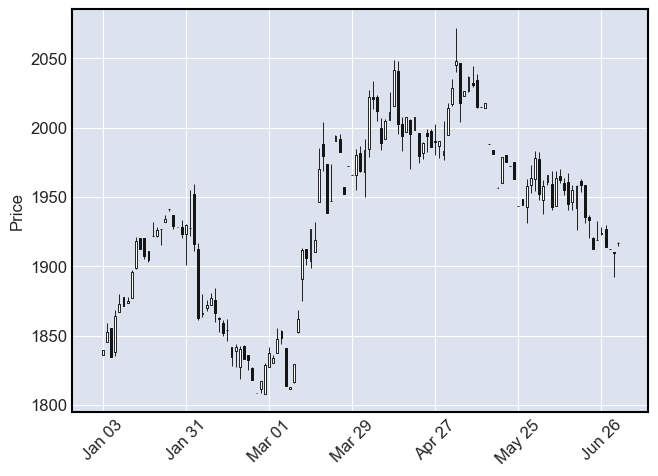

In [5]:
mpl.plot(df, type="candle")